<a href="https://colab.research.google.com/github/Ambeyi037/Football-Data-Analytics-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import geopandas as gpd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Predict the full time winner of the game

In [36]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/pr2023.csv')
# df.iloc[:10,:24]
data=df.iloc[:,3:24]
data_cols=list(df.columns[2:24])
data


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Burnley,Man City,0,3,A,0,2,A,C Pawson,6,...,1,8,11,8,6,5,0,0,1,0
1,Arsenal,Nott'm Forest,2,1,H,2,0,H,M Oliver,15,...,7,2,12,12,8,3,2,2,0,0
2,Bournemouth,West Ham,1,1,D,0,0,D,P Bankes,14,...,5,3,9,14,10,4,1,4,0,0
3,Brighton,Luton,4,1,H,1,0,H,D Coote,27,...,12,3,11,12,6,7,2,2,0,0
4,Everton,Fulham,0,1,A,0,0,D,S Attwell,19,...,9,2,12,6,10,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,15,...,9,2,10,8,2,4,1,4,0,0
376,Liverpool,Wolves,2,0,H,2,0,H,C Kavanagh,36,...,14,3,14,11,10,2,1,1,0,1
377,Luton,Fulham,2,4,A,1,2,A,M Donohue,15,...,6,7,15,20,4,4,5,4,0,0
378,Man City,West Ham,3,1,H,2,1,H,J Brooks,28,...,12,2,3,12,11,2,0,1,0,0


In [42]:
# EPL teams
epl_teams=list(data.AwayTeam.unique())
# EPL Referees
epl_referees=list(data.Referee.unique())
print(len(epl_referees),len(epl_teams))
# HTR and FTR
ht_winner=list(data.HTR.unique())
ft_winner=(data.FTR.unique())

# Converting epl_teams into numeric values
team_dict={}
for i,team in enumerate(epl_teams):
  team_dict[team]=i

# Converting epl_referees into numeric values
ref_dict={}
for i,ref in enumerate(epl_referees):
  ref_dict[ref]=i

winner_dict={}
for i,winner in enumerate(ht_winner):
  winner_dict[winner]=i


data['AwayTeam']=data['AwayTeam'].map(team_dict)
data['HomeTeam']=data['HomeTeam'].map(team_dict)
data['Referee']=data['Referee'].map(ref_dict)
data['HTR']=data['HTR'].map(winner_dict)
data['FTR']=data['FTR'].map(winner_dict)
data

# Columns with object data type
obj_cols=list(data.select_dtypes(include='object').columns)
data


29 20


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,19,0,0,3,0,0,2,0,0,6,...,1,8,11,8,6,5,0,0,1,0
1,18,1,2,1,1,2,0,1,1,15,...,7,2,12,12,8,3,2,2,0,0
2,12,2,1,1,2,0,0,2,2,14,...,5,3,9,14,10,4,1,4,0,0
3,13,3,4,1,1,1,0,1,3,27,...,12,3,11,12,6,7,2,2,0,0
4,16,4,0,1,0,0,0,2,4,19,...,9,2,12,6,10,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,5,6,5,0,1,2,0,1,10,15,...,9,2,10,8,2,4,1,4,0,0
376,8,9,2,0,1,2,0,1,20,36,...,14,3,14,11,10,2,1,1,0,1
377,3,4,2,4,0,1,2,0,28,15,...,6,7,15,20,4,4,5,4,0,0
378,0,2,3,1,1,2,1,1,5,28,...,12,2,3,12,11,2,0,1,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

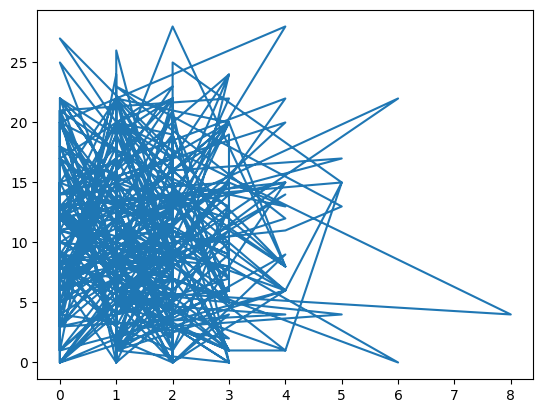

In [49]:
data.columns
plt.plot(data.FTAG,data.Referee)
plt.show

<BarContainer object of 380 artists>

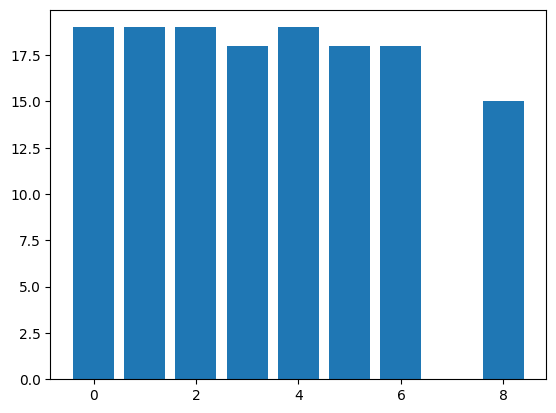

In [52]:
plt.bar(data.FTAG,data.AwayTeam)

<ipython-input-58-ca3204061fc2>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


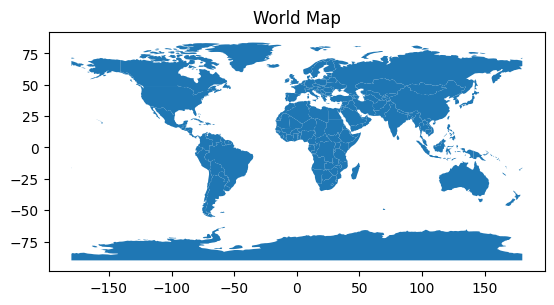

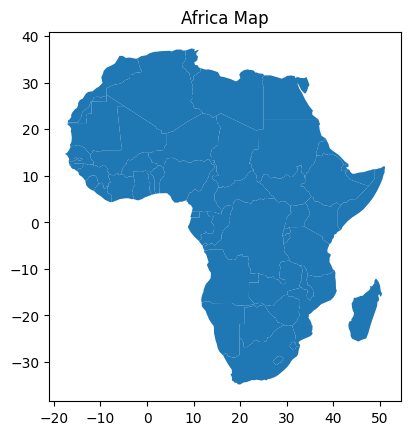

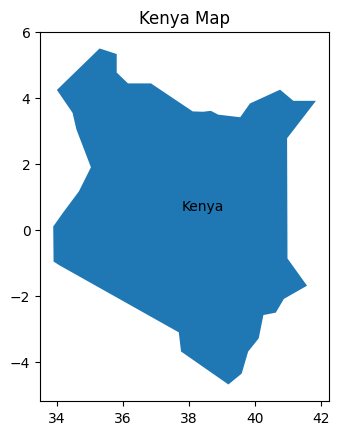

In [58]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()
plt.title('World Map')
plt.show()
# Plot East Africa map with the countries
africa = world[world.continent == 'Africa']
africa.plot()
plt.title('Africa Map')
plt.show()
# Plot Kenyan map
kenya = world[world.name == 'Kenya']
kenya.plot()
# Label all the countries in Africa on the map
for idx, row in kenya.iterrows():
    plt.annotate(row['name'], (row['geometry'].centroid.x, row['geometry'].centroid.y))
plt.title('Kenya Map')
plt.show()
